# Model Tuning

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Prima Indians Diabetes Dataset

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', 
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X.shape, y.shape

((768, 8), (768,))

## Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# Train-Test-Split/Instantiate/Fit/Predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

## Metrics for classification

### Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[174  32]
 [ 36  66]]


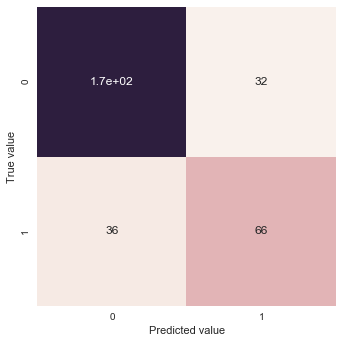

In [7]:
from sklearn.metrics import classification_report
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

### Classification Report

In [8]:
# Generate the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



## Receiver Operating Characteristic (ROC) curve

In [9]:
from sklearn.metrics import roc_curve

In [10]:
# Compute predicted probabilities
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob.shape

(308, 2)

In [11]:
y_pred_prob = y_pred_prob[:,1]
y_pred_prob.shape

(308,)

In [12]:
# Generate ROC curve values: false positive rates (fpr), true positive rates (tpr), thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [13]:
fpr

array([ 0.        ,  0.        ,  0.00485437,  0.00485437,  0.00970874,
        0.00970874,  0.01456311,  0.01456311,  0.01941748,  0.01941748,
        0.02427184,  0.02427184,  0.02912621,  0.02912621,  0.03883495,
        0.03883495,  0.04368932,  0.04368932,  0.04854369,  0.04854369,
        0.0631068 ,  0.0631068 ,  0.07281553,  0.07281553,  0.0776699 ,
        0.0776699 ,  0.09223301,  0.09223301,  0.09708738,  0.09708738,
        0.11165049,  0.11165049,  0.12135922,  0.12135922,  0.12621359,
        0.12621359,  0.17475728,  0.17475728,  0.2038835 ,  0.2038835 ,
        0.20873786,  0.20873786,  0.22330097,  0.22330097,  0.22815534,
        0.22815534,  0.24271845,  0.24271845,  0.27184466,  0.27184466,
        0.2815534 ,  0.2815534 ,  0.28640777,  0.28640777,  0.30097087,
        0.30097087,  0.31553398,  0.31553398,  0.33009709,  0.33009709,
        0.3592233 ,  0.3592233 ,  0.37378641,  0.37378641,  0.39320388,
        0.39320388,  0.42718447,  0.42718447,  0.43203883,  0.43

In [14]:
tpr

array([ 0.00980392,  0.02941176,  0.02941176,  0.05882353,  0.05882353,
        0.06862745,  0.06862745,  0.14705882,  0.14705882,  0.20588235,
        0.20588235,  0.21568627,  0.21568627,  0.24509804,  0.24509804,
        0.25490196,  0.25490196,  0.2745098 ,  0.2745098 ,  0.33333333,
        0.33333333,  0.34313725,  0.34313725,  0.46078431,  0.46078431,
        0.48039216,  0.48039216,  0.53921569,  0.53921569,  0.56862745,
        0.56862745,  0.57843137,  0.57843137,  0.62745098,  0.62745098,
        0.64705882,  0.64705882,  0.66666667,  0.66666667,  0.68627451,
        0.68627451,  0.69607843,  0.69607843,  0.71568627,  0.71568627,
        0.74509804,  0.74509804,  0.75490196,  0.75490196,  0.76470588,
        0.76470588,  0.7745098 ,  0.7745098 ,  0.79411765,  0.79411765,
        0.81372549,  0.81372549,  0.82352941,  0.82352941,  0.83333333,
        0.83333333,  0.84313725,  0.84313725,  0.85294118,  0.85294118,
        0.8627451 ,  0.8627451 ,  0.87254902,  0.87254902,  0.89

In [15]:
thresholds

array([ 0.95788292,  0.87304029,  0.85340241,  0.82568586,  0.80943785,
        0.80272362,  0.79628055,  0.75695514,  0.75422011,  0.73540083,
        0.73511947,  0.7323873 ,  0.72868112,  0.71814973,  0.70385218,
        0.70376101,  0.70209951,  0.69557878,  0.69397246,  0.67458055,
        0.66848586,  0.66775433,  0.65956332,  0.61422378,  0.61383561,
        0.60944096,  0.59656819,  0.57290656,  0.57156895,  0.55610396,
        0.54673971,  0.54376043,  0.54091741,  0.51995806,  0.5171649 ,
        0.51594406,  0.48676197,  0.48442043,  0.4562041 ,  0.44970214,
        0.44884147,  0.44222303,  0.42751384,  0.42442166,  0.42117655,
        0.40807506,  0.40254196,  0.40213599,  0.37725708,  0.37650754,
        0.36300458,  0.3629603 ,  0.36278259,  0.3579735 ,  0.35424411,
        0.34749257,  0.33863223,  0.33829129,  0.33376253,  0.3336334 ,
        0.32196496,  0.31711433,  0.31501889,  0.31273633,  0.30916461,
        0.30871854,  0.28771678,  0.28685976,  0.28449382,  0.28

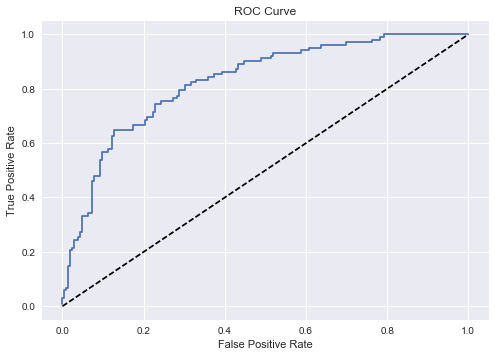

In [16]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

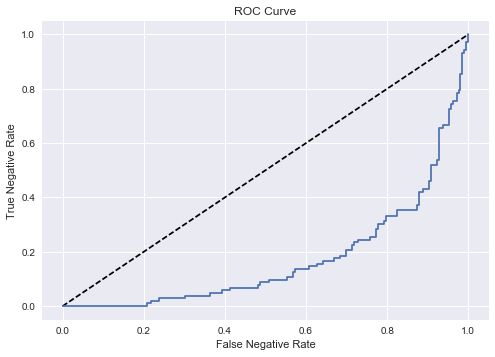

In [18]:
y_pred_prob_2 = log_reg.predict_proba(X_test)[:,0]
fnr, tnr, thresholds = roc_curve(y_test, y_pred_prob_2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fnr, tnr)
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('ROC Curve')
plt.show()

## Area under ROC curve (AUC)

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [20]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8268608414239483


In [21]:
# Compute cross-validated AUC scores
cv_auc = cross_val_score(log_reg, X_test, y_test, cv=5, scoring='roc_auc')

In [22]:
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [ 0.84353741  0.81881533  0.87317073  0.77926829  0.73292683]


## Hyperparameter tuning
Hyperparameters cannot be learned by fitting the model

### GridSearchCV

In [1]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Setup the hyperparameter grid
# C hyperparameter controls the inverse of the regularization strength, 
#     large C can lead to an overfit model, while a small C can lead to an underfit model
# Penalty hyperparameter specifies whether to use 'l1' or 'l2' regularization
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 
              'penalty': ['l1', 'l2']}

In [27]:
# Instantiate a logistic regression classifier
logreg = LogisticRegression()

In [28]:
# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

In [29]:
# Fit it to the data
logreg_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
# Print the tuned parameters
logreg_cv.best_params_

{'C': 31.622776601683793, 'penalty': 'l1'}

In [31]:
# Print the tuned score
logreg_cv.best_score_

0.77083333333333337

### RandomizedSearchCV

In [21]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [16]:
# Setup the parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [17]:
# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

In [18]:
# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [19]:
# Fit it to the data
tree_cv.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116ff2748>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116ff2898>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [24]:
# Print the tuned parameters
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 6}

In [25]:
# Print the tuned score
tree_cv.best_score_

0.73958333333333337